In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/deep_learning/deep_learning_fawad_hussain_youtube/breast_cancer_dataset.csv') #please add the path of the csv file
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Benign:  357
Malignant:  212


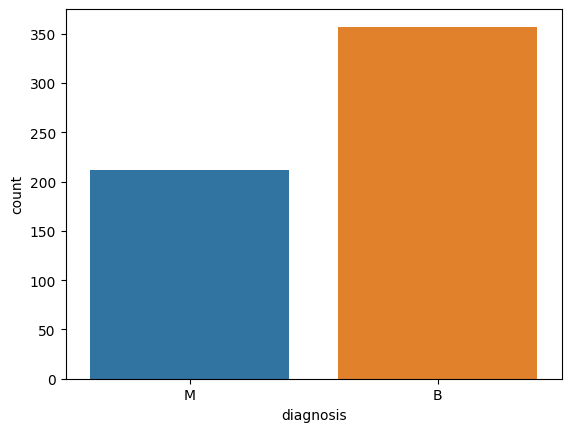

In [3]:
import seaborn as sns
sns.countplot(x=data['diagnosis'],label='Count')
Benign,Malignant = data['diagnosis'].value_counts()
print('Benign: ',Benign)
print('Malignant: ',Malignant)


In [4]:
# Remove Unnamed 32 column in the given dataframe
del data['Unnamed: 32']

In [5]:
#Separate the X and y from the dataframe
X = data.iloc[:,2:].values
y = data['diagnosis'].values


In [6]:
#Let's encode the categorical data in y by labelencoder
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [7]:
#Splitting the data into the training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)


In [8]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train

array([[-0.74998027, -1.09978744, -0.74158608, ..., -0.6235968 ,
         0.07754241,  0.45062841],
       [-1.02821446, -0.1392617 , -1.02980434, ..., -0.7612376 ,
        -1.07145262, -0.29541379],
       [-0.53852228, -0.29934933, -0.56857428, ..., -0.50470441,
         0.34900827, -0.13371556],
       ...,
       [-1.3214733 , -0.20855336, -1.3143845 , ..., -0.98621857,
        -0.69108476, -0.13148524],
       [-1.24245479, -0.23244704, -1.27759928, ..., -1.7562754 ,
        -1.55125275, -1.01078909],
       [-0.74441558,  1.13188181, -0.72016173, ..., -0.28490593,
        -1.2308599 ,  0.20083251]])

In [10]:
X_test

array([[-0.21855296,  0.31710749, -0.14938447, ...,  1.36998461,
         1.0939611 ,  1.51560644],
       [-0.27141746,  1.44727832, -0.33290634, ..., -0.84095647,
        -0.70686766, -0.88310324],
       [-0.04604776, -0.84412512, -0.11098232, ..., -0.50394228,
        -1.19298094, -0.92659449],
       ...,
       [-0.13230036, -0.12253613, -0.14574637, ...,  0.20087616,
        -0.06766026,  0.36754897],
       [-0.24637638,  0.56799108, -0.28682376, ..., -0.90055508,
        -0.40225771, -0.95558866],
       [-1.35013142,  0.65639767, -1.34712739, ..., -1.36545479,
        -0.72107227, -0.54576727]])

In [11]:
!pip install keras

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [13]:
from keras.layers import Dropout

#adding the input and the first hidden layer

classifier = Sequential()
classifier.add(Dense(units=16,activation='relu',input_dim=30))
#classifier.add(Dropout(p=1.0))

#adding the second hidden layer
classifier.add(Dense(units=16,activation='relu'))
#classifier.add(Dropout(1.0))

#adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [14]:
#Now let's compile the model with the optimizer(eg. gradient dececnt) as Adam and loss fn as binary crossentropy
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
4/4 [==============================] - 1s 4ms/step - loss: 0.9524 - accuracy: 0.1910
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 0.8890 - accuracy: 0.2387
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8311 - accuracy: 0.2839
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7794 - accuracy: 0.3342
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7355 - accuracy: 0.3693
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4372
Epoch 7/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6605 - accuracy: 0.4950
Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.5553
Epoch 9/150
4/4 [==============================] - 0s 7ms/step - loss: 0.5981 - accuracy: 0.6457
Epoch 10/150
4/4 [==============================] - 0s 5ms/step - loss: 0.5691 - accuracy: 0.7387
Epoch 11/150
4/4 [===========

In [16]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = y_pred>0.5

6/6 [==============================] - 0s 2ms/step


In [17]:
#Let's make the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [18]:
cm

array([[105,   3],
       [  3,  60]])

<Axes: >

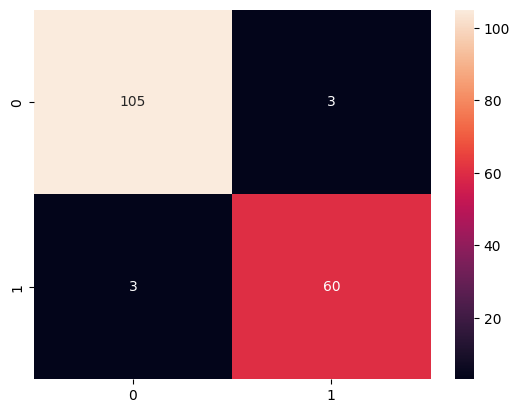

In [20]:
sns.heatmap(cm, annot=True,fmt='.0f')

In [21]:
#Accuracy after training
(105+60)/(105+60+6)

0.9649122807017544